In [2]:
%%capture
pip install kaggle

In [3]:
import os
import getpass 
os.environ['KAGGLE_USERNAME'] = "naveengubba"

import sys

os.environ['KAGGLE_KEY'] = getpass.getpass()

 ································


In [5]:
!kaggle datasets download  -d patrickb1912/ipl-complete-dataset-20082020 --path assignment --unzip

 73%|███████████████████████████▊          | 1.00M/1.37M [00:00<00:00, 7.40MB/s]
100%|██████████████████████████████████████| 1.37M/1.37M [00:00<00:00, 4.05MB/s]


In [6]:
#change filenames
import os 
ind = os.listdir(os.getcwd()).index('assignment')

for file in os.listdir((os.getcwd())+'/'+os.listdir(os.getcwd())[ind]):
    if 'Ball' in file:
        os.rename(f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/{file}",f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/detail.csv")
    if "Match" in file:
        os.rename(f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/{file}",f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/summary.csv")

for file in os.listdir((os.getcwd())+'/'+os.listdir(os.getcwd())[ind]):
    if 'Ball' in file:
        print("error")
    if "Match" in file:
        print("error") 

In [7]:
#make dataframes
import pandas as pd

for file in os.listdir((os.getcwd())+'/'+os.listdir(os.getcwd())[ind]):
    if 'detail' in file:
        detail = pd.read_csv(f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/{file}")
    if "summary" in file:
        summary = pd.read_csv(f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/{file}")
                              
# pd.read_csv(f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/{os.listdir((os.getcwd())+'/'+os.listdir(os.getcwd())[ind])[1]}")
# pd.read_csv(f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/{os.listdir((os.getcwd())+'/'+os.listdir(os.getcwd())[ind])[0]}")


In [8]:
summary['date'] = pd.to_datetime(summary['date']).dt.year
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    int64  
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
#each team
#win by wickets/runs time period 
#best player time period 
#strike rate of team vs other teams time period

Text(0.5, 1.0, 'Victory type (by runs/wickets) distribution')

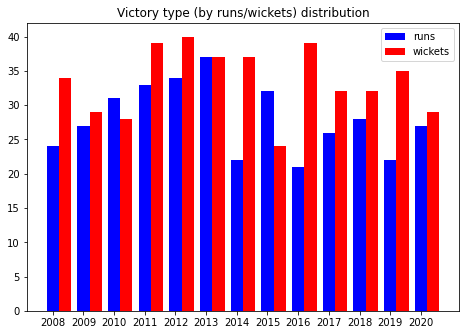

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()

data = summary.loc[:,('date','team1','team2','winner','result')].sort_values(by='date')


w = 0.4
ax = fig.add_axes([0,0,1,1])

win_type = summary.loc[:,('date','result')].groupby(['date','result']).size().reset_index(name='score_type')
runs = win_type[win_type.result=='runs']
wickets = win_type[win_type.result=='wickets']

ax.bar(runs['date'], runs['score_type'],w, color='b')
ax.bar(wickets['date']+0.4, wickets['score_type'], w,color='r')
ax.legend(labels=['runs','wickets'])
ax.set_xticks(data.date.unique())
ax.set_xticklabels(data.date.unique())
ax.set_title('Victory type (by runs/wickets) distribution')

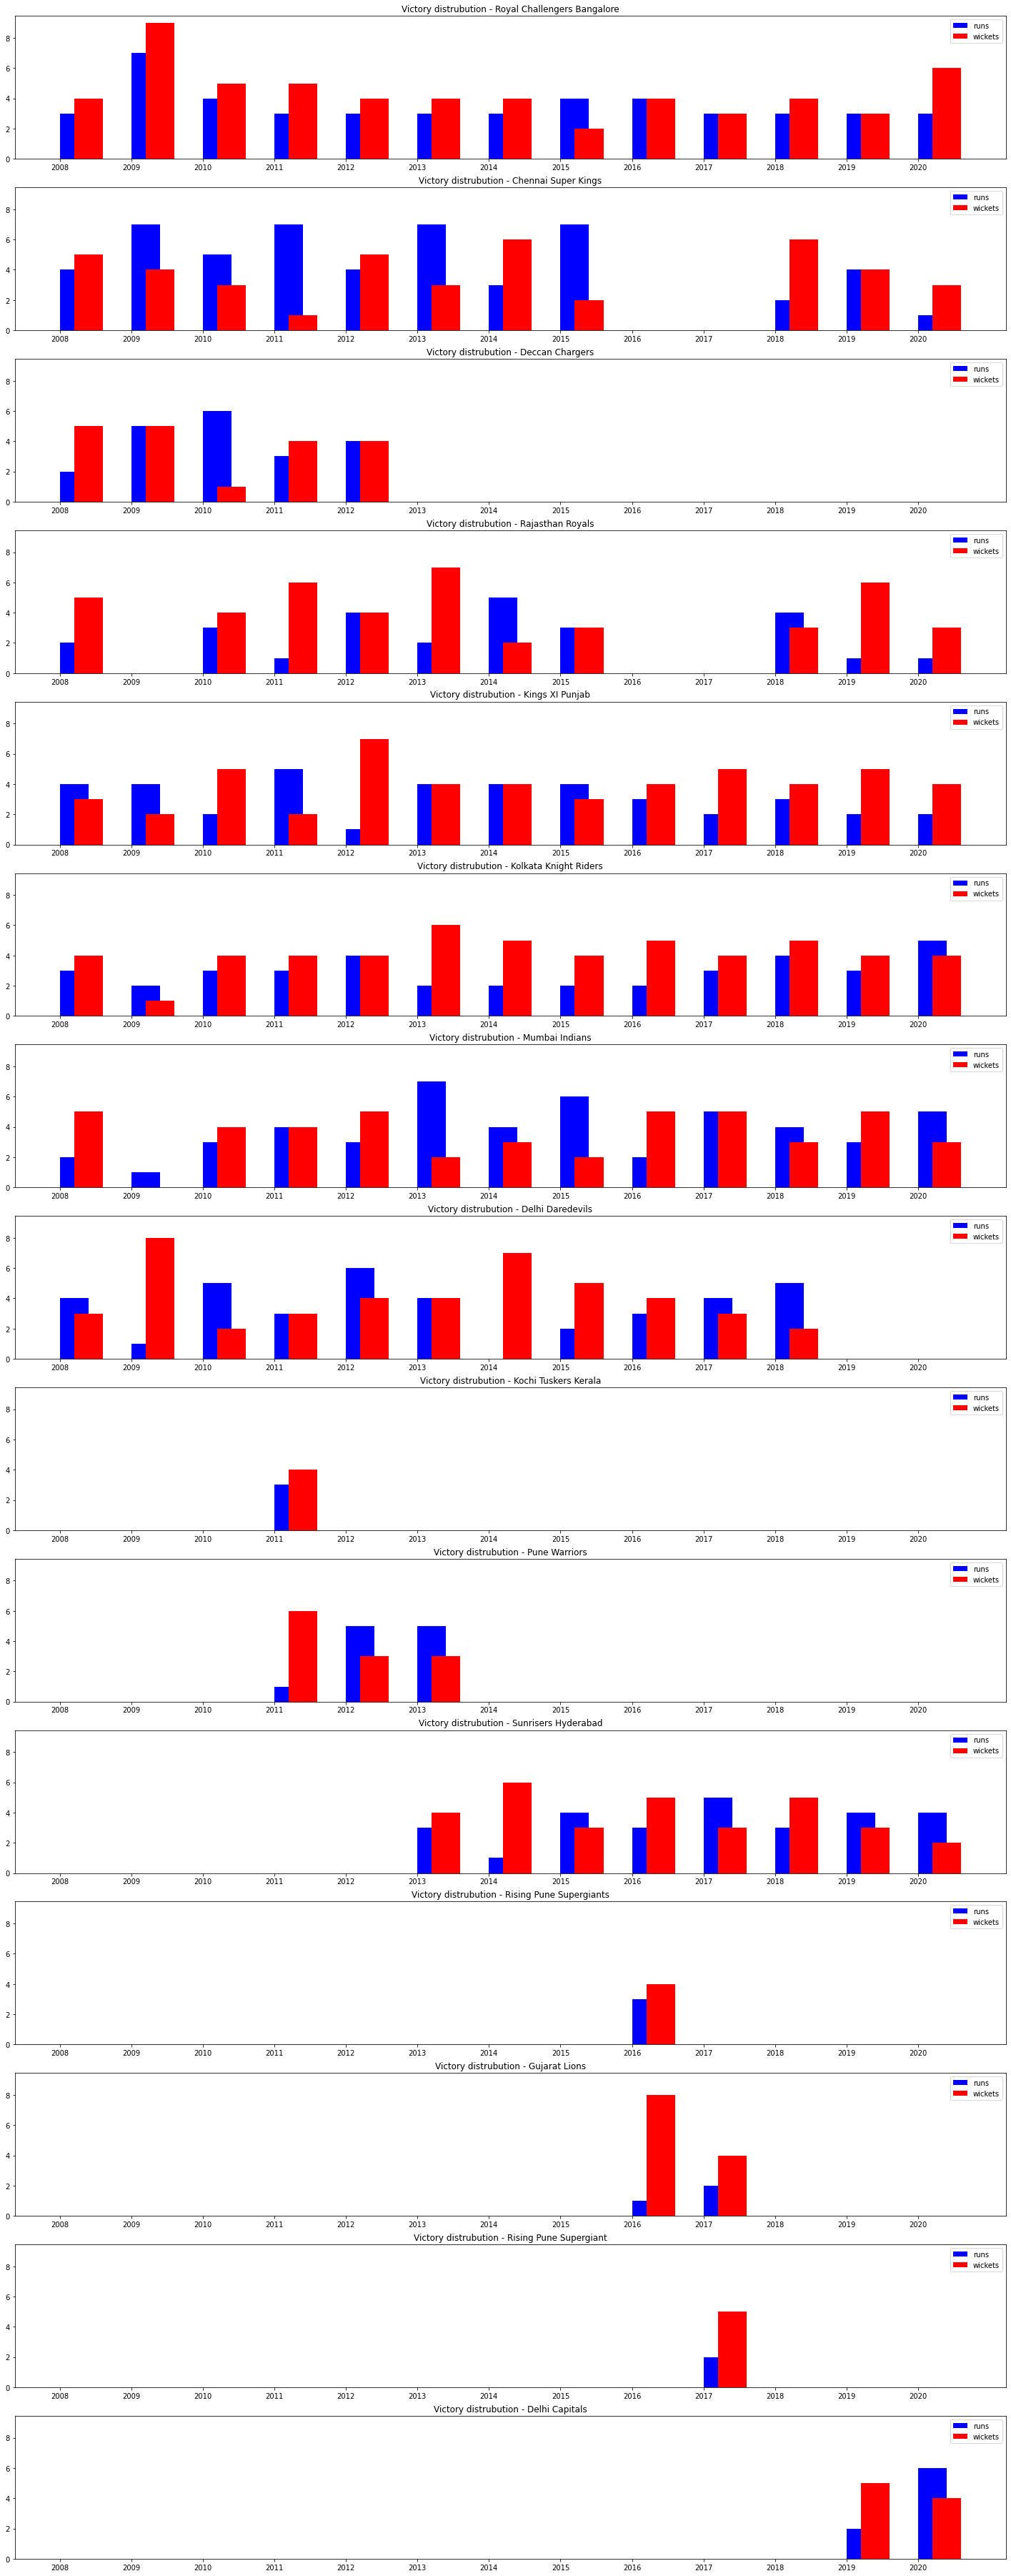

In [31]:



fig,axes = plt.subplots(data.team1.unique().shape[0],1,figsize = (20,50),sharex=True,sharey=True)
# fig.suptitle('Team wise winning distribution')
fig.tight_layout()
fig.subplots_adjust(hspace =.2)

for x,team in enumerate(data.team1.unique()):  
    data_team=data.loc[data.team1==team]
    runs=data_team[data_team.team1==data_team.winner]
    runs = data_team.loc[data_team.result=='runs']
    runs = runs.groupby(['date','team1']).size().reset_index(name='runs_count')
    wickets = data_team.loc[data_team.result=='wickets']
    wickets = wickets.groupby(['date','team1']).size().reset_index(name='wickets_count')
    axes[x].bar(runs['date'],runs['runs_count'],0.4,color='b',align='edge')
    axes[x].set_title(f"Victory distrubution - {team}")
    axes[x].bar(wickets['date']+0.2,wickets['wickets_count'],0.4,color='r',align='edge')
    axes[x].set_xticks(data.date.unique())
    axes[x].set_xticklabels(data.date.unique())
    axes[x].xaxis.set_tick_params(which='both', labelbottom=True)
    axes[x].legend(labels=['runs','wickets'],loc="upper right")


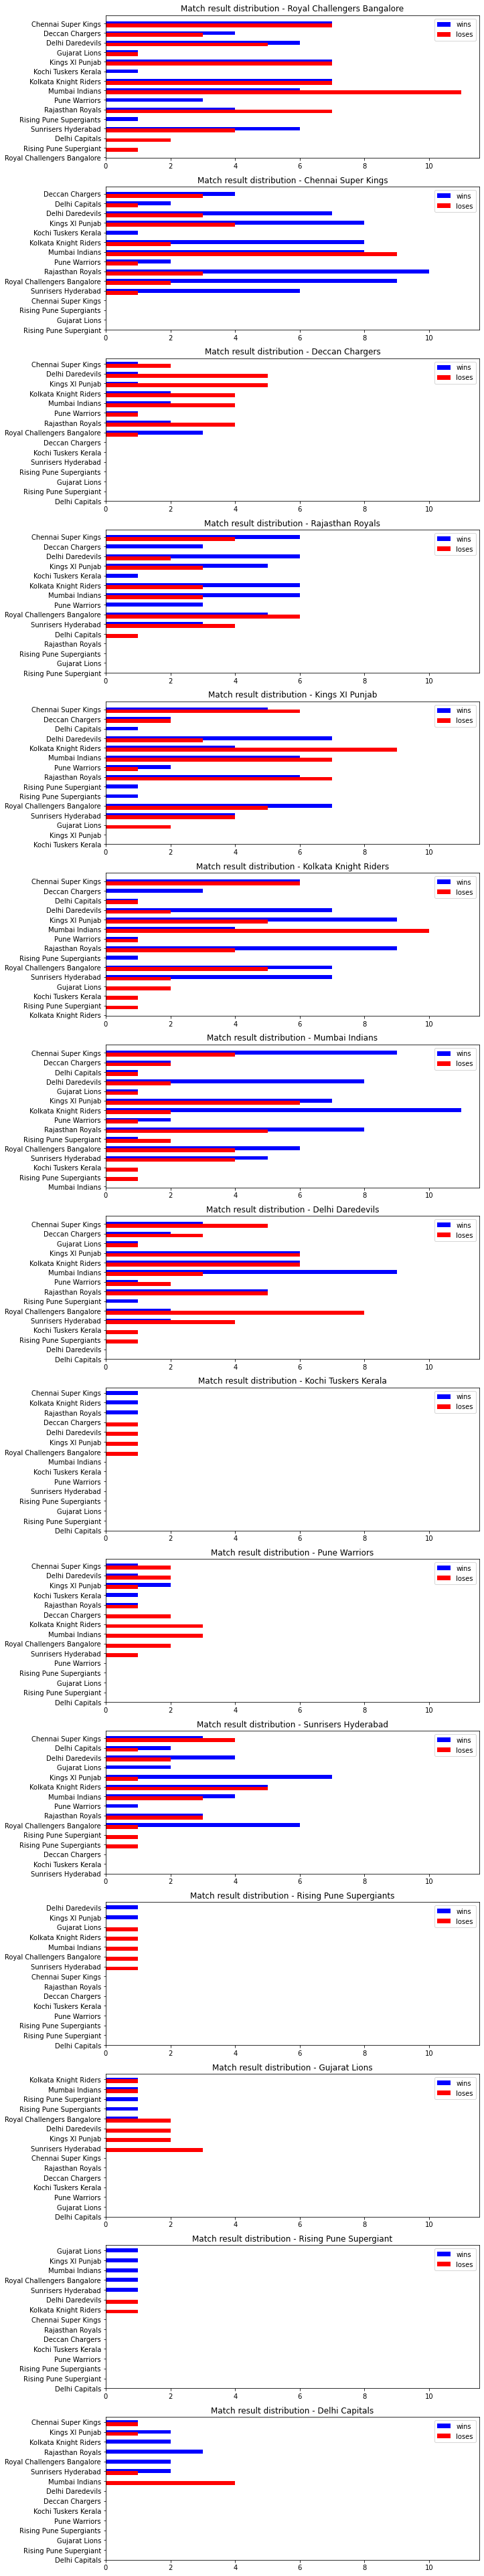

In [36]:
fig,axes = plt.subplots(data.team1.unique().shape[0],1,figsize = (10,70),sharex=True,sharey=False)


for x,team in enumerate(data.team1.unique()):  
    data_team=data.loc[data.team1==team]
    won =data_team[data_team.team1==data_team.winner]
    won = won.groupby(['team1','team2']).size().reset_index(name='win_count')
    loser = data_team[data_team.team1!=data_team.winner]
    loser = loser.groupby(['team1','team2']).size().reset_index(name='loser_count')
    axes[x].barh(won['team2'],won['win_count'],0.4,color='b',align='center')
    axes[x].set_title(f"Match result distribution - {team}")
    axes[x].barh(loser['team2'],loser['loser_count'],0.4,color='r',align='edge')
    axes[x].invert_yaxis()
#     win_list= list(won.team2.unique())
#     lose_list = list(loser.team2.unique())
#     axes[x].set_yticklabels(np.array(set(win_list+ lose_list)))
    axes[x].set_yticks(data.team2.unique())
    axes[x].set_yticklabels(data.team2.unique())
    axes[x].xaxis.set_tick_params(which='both', labelbottom=True)
    axes[x].legend(labels=['wins','loses'],loc="upper right")


In [13]:
detail[detail.id.isin([335982,335983])].groupby(['id','inning','batting_team','bowling_team']).sum()['total_runs'].reset_index()

,id,inning,batting_team,bowling_team,total_runs
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,222
1,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,82
2,335983,1,Chennai Super Kings,Kings XI Punjab,240
3,335983,2,Kings XI Punjab,Chennai Super Kings,207


In [15]:
detail = detail.merge(summary.loc[:,('id','date')],on='id',how='left')

In [16]:
detail_strike = detail.loc[:,('batting_team','bowling_team')].groupby(
    ['batting_team','bowling_team']).size().rename('ball_count').reset_index()

detail_bat_runs = detail.loc[:,('batting_team','bowling_team','batsman_runs')].groupby(
    ['batting_team','bowling_team'])['batsman_runs'].sum().reset_index(name='batsman_runs')

detail_strike = detail_strike.merge(detail_bat_runs.loc[:,'batsman_runs'],on=detail_strike.index.values,how='left')
detail_strike['strike_rate'] = (100*detail_strike['batsman_runs'])/detail_strike['ball_count']

# del detail_strike
# del detail_bat_runs

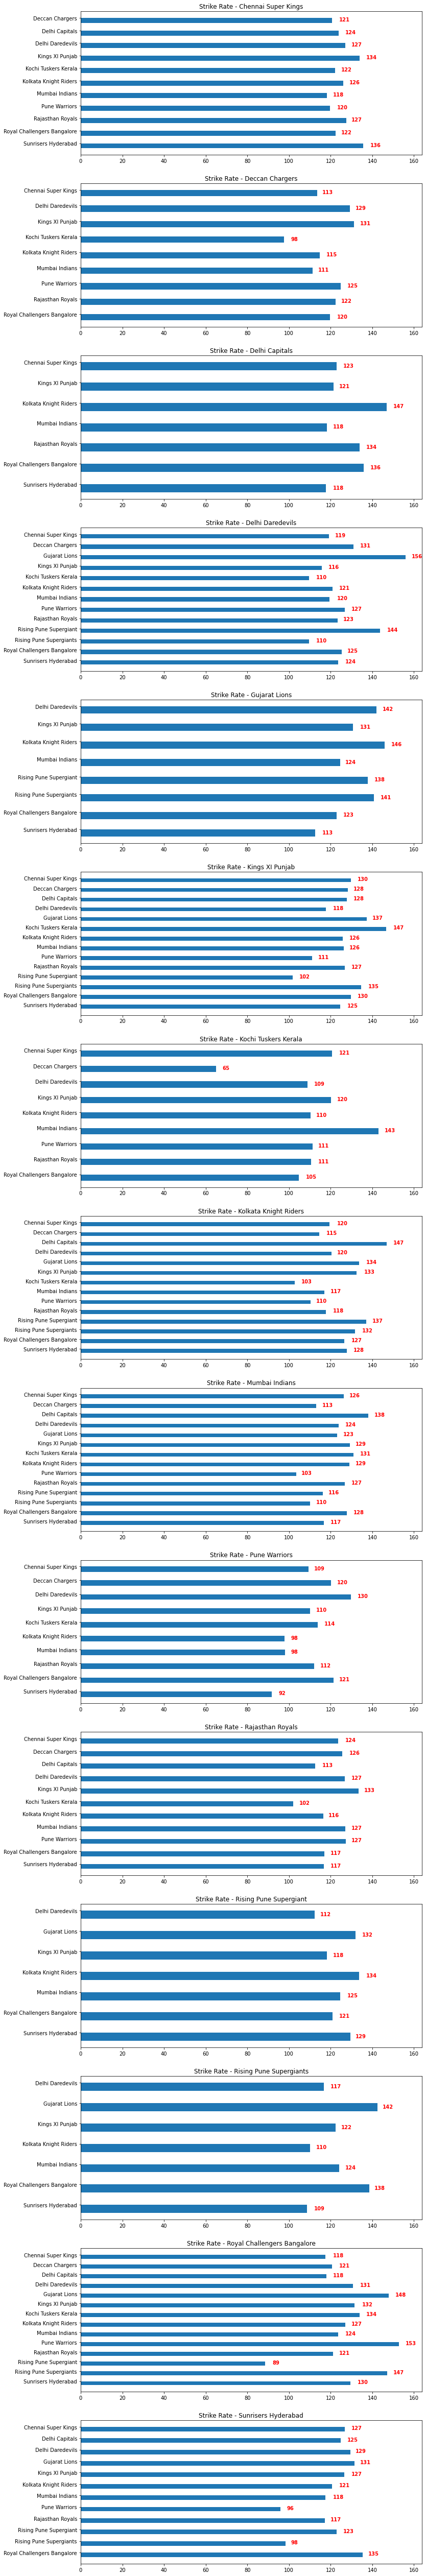

In [30]:
fig,axes = plt.subplots(detail_strike.batting_team.unique().shape[0],1,figsize = (10,70),sharex=True,sharey=False)
# fig.suptitle("Team wise Strike-Rate")
fig.tight_layout()
fig.subplots_adjust(hspace =.2)
for x, team in enumerate(detail_strike.batting_team.unique()): 
    team_strike=detail_strike.loc[detail_strike.batting_team==team]
    axes[x].barh(team_strike.bowling_team,team_strike.strike_rate,0.4,align='edge')
    axes[x].invert_yaxis()
    for i, s_r in enumerate(team_strike.strike_rate):
        axes[x].text(round(s_r + 3,0), i + .25, str(round(s_r)), color='red', fontweight='bold')
    axes[x].set_title(f"Strike Rate - {team}")
    axes[x].set_yticks(team_strike.bowling_team)
    axes[x].set_yticklabels(team_strike.bowling_team)
    axes[x].xaxis.set_tick_params(which='both', labelbottom=True)


In [41]:
import pandas as pd
import sys
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
temp = sorted([(x, sys.getsizeof(globals().get(x))/(1024*1024))
        for x in dir() 
        if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)
df_temp = pd.DataFrame(temp, columns = ['variable', 'size_in_MB'])
df_temp.head()

,variable,size_in_MB
0,temp,0.000092
1,pd,0.000076
2,x,0.000050


In [38]:
# Delete files and folders created

import os 
ind = os.listdir(os.getcwd()).index('assignment')
for file in os.listdir(os.listdir(os.getcwd())[ind]):
    os.remove((os.path.join(os.listdir(os.getcwd())[ind],file)))
os.rmdir(os.getcwd()+'/'+os.listdir(os.getcwd())[ind])

In [42]:
#Deleting all variables created
for x in dir():
    if not x.startswith('_') and x not in sys.modules and x not in ipython_vars:
        del globals()[x]
[x for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars]

[]